In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
32929,56.97297286987305,24.165752410888672,2024-11-21 16:52:32
32930,56.97297286987305,24.165752410888672,2024-11-21 16:52:32
32931,56.97297286987305,24.165752410888672,2024-11-21 16:52:32
32932,56.97297286987305,24.165752410888672,2024-11-21 16:52:32


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
32929,56.97297286987305,24.165752410888672,2024-11-21 16:52:32,2024-11-21 16
32930,56.97297286987305,24.165752410888672,2024-11-21 16:52:32,2024-11-21 16
32931,56.97297286987305,24.165752410888672,2024-11-21 16:52:32,2024-11-21 16
32932,56.97297286987305,24.165752410888672,2024-11-21 16:52:32,2024-11-21 16


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

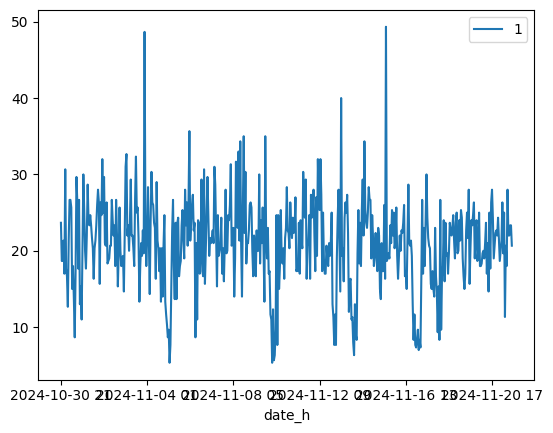

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


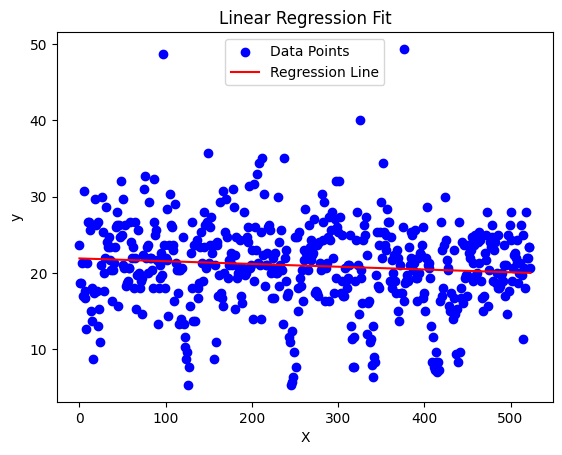

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [17]:
y_pred

array([[21.89717921],
       [21.89355857],
       [21.88993793],
       [21.88631729],
       [21.88269664],
       [21.879076  ],
       [21.87545536],
       [21.87183472],
       [21.86821408],
       [21.86459344],
       [21.8609728 ],
       [21.85735216],
       [21.85373152],
       [21.85011088],
       [21.84649024],
       [21.8428696 ],
       [21.83924896],
       [21.83562832],
       [21.83200768],
       [21.82838704],
       [21.82476639],
       [21.82114575],
       [21.81752511],
       [21.81390447],
       [21.81028383],
       [21.80666319],
       [21.80304255],
       [21.79942191],
       [21.79580127],
       [21.79218063],
       [21.78855999],
       [21.78493935],
       [21.78131871],
       [21.77769807],
       [21.77407743],
       [21.77045679],
       [21.76683614],
       [21.7632155 ],
       [21.75959486],
       [21.75597422],
       [21.75235358],
       [21.74873294],
       [21.7451123 ],
       [21.74149166],
       [21.73787102],
       [21